In [115]:
%matplotlib inline

In [3]:
from scipy.stats import cauchy
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import gengamma

Problem 2.11

In [14]:
#a
x = np.linspace(0,1,200)
posterior = np.zeros(len(x))

In [22]:
def lhood(theta):
    data = np.array([-2, -1, 0, 1.5, 2.5])
    lhood_fn = lambda x: 1. / (1 + (x - theta)**2)
    lhood_fn = np.vectorize(lhood_fn)
    mped_data = lhood_fn(data)
    return mped_data.prod()

In [23]:
for i in range(len(x)):
    posterior[i] = lhood(x[i])

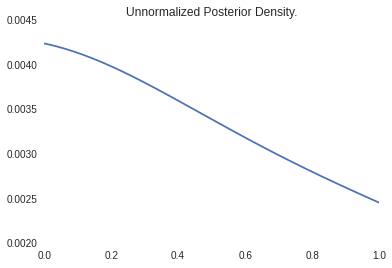

In [26]:
plt.plot(x, posterior)
plt.title('Unnormalized Posterior Density.')

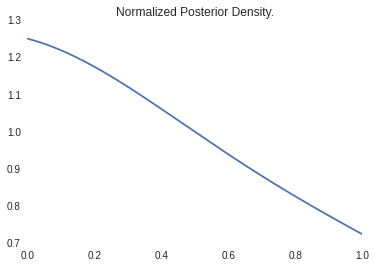

In [28]:
norm_posterior = posterior / (sum(posterior) / float(len(x)))
plt.plot(x, norm_posterior)
plt.title('Normalized Posterior Density.')

(array([ 69.,  71.,  71.,  55.,  61.,  50.,  62.,  47.,  52.,  38.,  51.,
         52.,  39.,  40.,  45.,  45.,  37.,  37.,  47.,  31.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

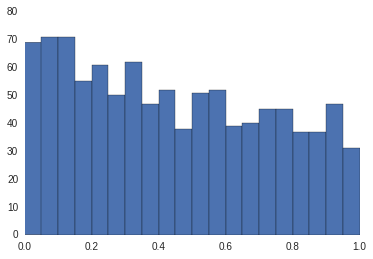

In [35]:
#b
samples = np.random.choice(x, p = norm_posterior / len(x), size = 1000)
plt.hist(samples, bins = 20)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.,    5.,   52.,  936.,    3.,
           0.,    0.,    0.,    0.,    1.]),
 array([-2583.62352421, -2523.66540425, -2463.70728429, -2403.74916433,
        -2343.79104436, -2283.8329244 , -2223.87480444, -2163.91668448,
        -2103.95856452, -2044.00044456, -1984.04232459, -1924.08420463,
        -1864.12608467, -1804.16796471, -1744.20984475, -1684.25172479,
        -1624.29360482, -1564.33548486, -1504.3773649 , -1444.41924494,
        -1384.46112498, -1324.50300502, -1264.54488505, -1204.58676509,
        -1144.62864513, -1084.67052517, -1024.71240521,  -964.75428524,
         -904.79616528,  -844.83804532,  -784.87992536,  -724.9218054 ,
         -664.96368544, 

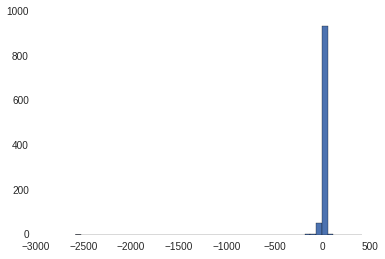

In [49]:
#c
prediction_samples = np.zeros(1000)
for i in range(1000):
    prediction_samples[i] = cauchy(loc = samples[i]).rvs(1)[0]
plt.hist(prediction_samples, bins = 50)

Problem 2.13

In [50]:
fatal_accidents = np.array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22])
passenger_deaths = np.array([734, 516, 754, 877, 814, 362, 764, 809, 223, 1066])
death_rate = np.array([.19, .12, .15, .16, .14, .06, .13, .13, .03, .15])

In [66]:
#a
rv = gamma(a = .5 + sum(fatal_accidents), scale = 1. / len(fatal_accidents)) #gamma(.5,0) prior
post_samples = rv.rvs(size = 1000)
print '95% CI from simulation:'
print np.percentile(post_samples, q = [2.5, 97.5])
print '95% CI from normal approximation:'
mean, var = rv.stats(moments = 'mv')
print mean - 2*np.sqrt(var), mean + 2*np.sqrt(var)

95% CI from simulation:
[ 20.88380686  26.81181977]
95% CI from normal approximation:
20.7613109577 26.9386890423


95% CI from simulation:
[ 22.  45.]


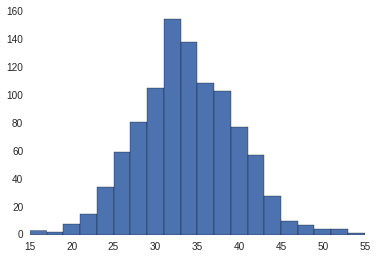

In [77]:
#b
miles_1986 = 8*10**3
miles_flown = passenger_deaths / death_rate
rv = gamma(a = .5 + sum(fatal_accidents), scale = 1. / sum(miles_flown))
post_samples_theta = rv.rvs(size = 1000)
post_pred_samples = np.zeros(1000)
for i in range(1000):
    post_pred_samples[i] = poisson(post_samples_theta[i]*miles_1986).rvs(1)[0]
plt.hist(post_pred_samples, bins = 20)
print '95% CI from simulation:'
print np.percentile(post_pred_samples, [2.5, 97.5])

In [79]:
#c
rv = gamma(a = .5 + sum(passenger_deaths), scale = 1. / len(passenger_deaths)) #gamma(.5,0) prior
post_samples = rv.rvs(size = 1000)
print '95% CI from simulation:'
print np.percentile(post_samples, q = [2.5, 97.5])
print '95% CI from normal approximation:'
mean, var = rv.stats(moments = 'mv')
print mean - 2*np.sqrt(var), mean + 2*np.sqrt(var)

95% CI from simulation:
[ 675.55470525  710.05263616]
95% CI from normal approximation:
675.313293595 708.586706405


95% CI from simulation:
[  901.  1034.]


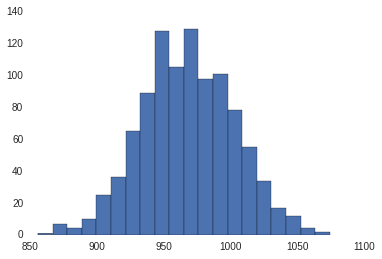

In [80]:
#d
rv = gamma(a = .5 + sum(passenger_deaths), scale = 1. / sum(miles_flown))
post_samples_theta = rv.rvs(size = 1000)
post_pred_samples = np.zeros(1000)
for i in range(1000):
    post_pred_samples[i] = poisson(post_samples_theta[i]*miles_1986).rvs(1)[0]
plt.hist(post_pred_samples, bins = 20)
print '95% CI from simulation:'
print np.percentile(post_pred_samples, [2.5, 97.5])

In [ ]:
#e
#b and d, if you belive in an underlying model where each flight has a probability p of crashing

Problem 2.17

In [13]:
#a
print '95% CI for beta(100,100):'
print beta.interval(.95, 100, 100)
#note the distribution is symmetric
rv = beta(a = 100, b = 100)
print 'Median:'
print rv.ppf(.5)

95% CI for beta(100,100):
(0.43095093094181675, 0.56904906905818331)
Median:
0.5


In [20]:
#b
print 'Exact:'
print beta(100 + 511, 100 + 1000 - 511).sf(.5)
print 'Normal approximation:'
mu = 611. / (1200)
var = 611. * 589 / ((1200)**2 * (1201))
print norm(loc = mu, scale = var**.5).sf(.5)

Exact:
0.737391338196
Normal approximation:
0.737434688041


Problem 2.18

In [23]:
posterior_sigma = 9**-.5*.12
posterior_theta = norm(loc = 17.653, scale = posterior_sigma)
posterior_pred = norm(loc = 17.653, scale = np.sqrt(posterior_sigma**2 + .12**2))
print '99% tolerance interval:'
print posterior_pred.interval(.99)

99% tolerance interval:
(17.327180501479209, 17.978819498520789)


Problem 2.23

In [87]:
#b
# grid search
best = np.inf
for i in np.arange(.1, 10, .1):
    for j in np.arange(.1, 10, .1):     
        al, be = i, j
        lb, ub = invgamma(a = al, scale = be).cdf(3), invgamma(a = al, scale = be).cdf(20)
        cost = np.abs(lb - .025) + np.abs(ub - .975)
        if cost < best:
            best = cost
            print cost, i, j, lb, ub

0.822696386034 0.1 0.1 0.254168715086 0.381472329052
0.815626159582 0.1 0.2 0.203004899627 0.337378740046
0.812176705872 0.1 0.3 0.172448240414 0.310271534542
0.810285039967 0.1 0.4 0.15074631116 0.290461271192
0.809269629564 0.1 0.5 0.134046558371 0.274776928808
0.808815426444 0.1 0.6 0.12058037321 0.261764946766
0.808749350909 0.1 0.7 0.109382135824 0.250632784915
0.778546547339 0.2 0.1 0.451400181299 0.62285363396
0.756117887405 0.2 0.2 0.373250326479 0.567132439073
0.74300026158 0.2 0.3 0.323956796185 0.530956534605
0.734126407957 0.2 0.4 0.287715500702 0.503589092745
0.727744997144 0.2 0.5 0.259106827538 0.481361830394
0.723020964087 0.2 0.6 0.235565402497 0.46254443841
0.719484114191 0.2 0.7 0.215656721565 0.446172607374
0.716840733615 0.2 0.8 0.198490542416 0.4316498088
0.714893755696 0.2 0.9 0.183473205666 0.41857944997
0.71350385809 0.2 1.0 0.170187378601 0.406683520512
0.712568528672 0.2 1.1 0.158327578269 0.395759049597
0.712009928929 0.2 1.2 0.147662926686 0.385652997757
0.

In [88]:
for i in np.arange(1, 3, .1):
    for j in np.arange(10, 30, .2):     
        al, be = i, j
        lb, ub = invgamma(a = al, scale = be).cdf(3), invgamma(a = al, scale = be).cdf(20)
        cost = np.abs(lb - .025) + np.abs(ub - .975)
        if cost < best:
            best = cost
            print cost, i, j, lb, ub

0.195720156292 1.8 10.2 0.116801267778 0.871081111486
0.193293907822 1.8 10.4 0.110602334227 0.867308426404
0.19119789913 1.8 10.6 0.10471326811 0.86351536898
0.189417268129 1.8 10.8 0.0991202043056 0.859702936176
0.187937649784 1.8 11.0 0.0938097499144 0.855872100131
0.186745174611 1.8 11.2 0.0887689834717 0.85202380886
0.18582646512 1.8 11.4 0.0839854520587 0.848158986939
0.185168630476 1.8 11.6 0.0794471666193 0.844278536143
0.184759259668 1.8 11.8 0.0751425957442 0.840383336076
0.184586413395 1.8 12.0 0.0710606581585 0.836474244764
0.18215400283 1.9 10.8 0.111976629583 0.879822626753
0.179794513414 1.9 11.0 0.106125798914 0.8763312855
0.177744337757 1.9 11.2 0.100561990922 0.872817653165
0.1759900508 1.9 11.4 0.0952726714637 0.869282620664
0.174518656296 1.9 11.6 0.0902457167181 0.865727060422
0.173317586706 1.9 11.8 0.0854694134785 0.862151826772
0.172374701262 1.9 12.0 0.0809324576025 0.858557756341
0.17167828244 1.9 12.2 0.0766239508644 0.854945668424
0.171217031082 1.9 12.4 0.0

In [89]:
for i in np.arange(2, 10, .1):
    for j in np.arange(20, 40, .2):     
        al, be = i, j
        lb, ub = invgamma(a = al, scale = be).cdf(3), invgamma(a = al, scale = be).cdf(20)
        cost = np.abs(lb - .025) + np.abs(ub - .975)
        if cost < best:
            best = cost
            print cost, i, j, lb, ub

0.0683390073559 3.0 20.0 0.0380376102845 0.919698602929
0.0627980917478 3.1 20.0 0.042554035786 0.929755944038
0.0624537010953 3.1 20.2 0.040526473097 0.928072772002
0.0622184841969 3.1 20.4 0.038589820601 0.926371336404
0.0620885895844 3.1 20.6 0.0367403792174 0.924651789633
0.0620602884541 3.1 20.8 0.0349745746975 0.922914286243
0.058732570596 3.2 20.0 0.0474358287573 0.938703258161
0.0580359918364 3.2 20.2 0.0452124872044 0.937176495368
0.0574550929014 3.2 20.4 0.0430867302722 0.935631637371
0.0569859054192 3.2 20.6 0.0410547089085 0.934068803489
0.0566245809815 3.2 20.8 0.0391126965794 0.932488115598
0.0563673894379 3.2 21.0 0.0372570874842 0.930889698046
0.0562107170336 3.2 21.2 0.0354843946129 0.929273677579
0.0561510644099 3.2 21.4 0.0337912476698 0.92764018326
0.056056934303 3.3 20.0 0.0526953106844 0.946638376381
0.0550076492058 3.3 20.2 0.0502662025037 0.945258553298
0.0540804160052 3.3 20.4 0.0479414095253 0.94386099352
0.0532711637401 3.3 20.6 0.0457169487892 0.942445785049

In [108]:
al_best, be_best = 4.7, 29.4
print 'For alpha = {0}, beta = {1}'.format(al_best, be_best)
print 'Prob(x < 3) = {0}'.format(invgamma(a = al_best, scale = be_best).cdf(3))
print 'Prob(x < 20) = {0}'.format(invgamma(a = al_best, scale = be_best).cdf(20))

For alpha = 4.7, beta = 29.4
Prob(x < 3) = 0.0250834580445
Prob(x < 20) = 0.974267317541


In [99]:
#d
# from part c, we have v_0 = 54, sig_0 = 6.94; v_0 = 9.4, sig_0 = 2.5
n = 672 #given
v = 13.85**2 #given

In [123]:
post_al_1 = .5 * (54 + n)
post_be_1 = .5 *(54 * 6.94**2 + n * v)
print 'For the prior from part a, 95% CI is:'
print invgamma(a = post_al_1, scale = post_be_1).ppf(.025)
print invgamma(a = post_al_1, scale = post_be_1).ppf(.975)

For the prior from part a, 95% CI is:
163.85748692
201.316680645


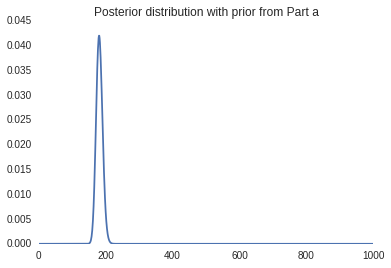

In [124]:
x = np.linspace(0, 1000, 1000)
plt.plot(x, invgamma(a = post_al_1, scale = post_be_1).pdf(x))
plt.title('Posterior distribution with prior from Part a')

In [126]:
post_al_2 = .5 * (9.4 + n)
post_be_2 = .5 *(9.4 * 2.5**2 + n * v)
print 'For the prior from part b, 95% CI is:'
print invgamma(a = post_al_2, scale = post_be_2).ppf(.025)
print invgamma(a = post_al_2, scale = post_be_2).ppf(.975)

For the prior from part b, 95% CI is:
170.670230785
211.083929192


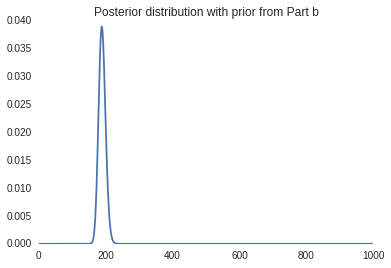

In [127]:
x = np.linspace(0, 1000, 1000)
plt.plot(x, invgamma(a = post_al_2, scale = post_be_2).pdf(x))
plt.title('Posterior distribution with prior from Part b')